In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

training_set = "../data/adult_train.csv"
test_set = "../data/adult_test.csv"

training_data = pd.read_csv(training_set)
test_data = pd.read_csv(test_set)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Examine the dataset
- check training and test labels
- check training and test features
    - check dtypes, and seperate numerical and object features
    - for "object" features, check if there are such labels in test set, but not in training set

In [2]:
train_y = training_data["label"]
train_x = training_data.drop("label", axis = 1)
print("training labels:")
print(train_y.value_counts())
print("-"*50)

test_y = test_data["label"]
test_x = test_data.drop("label", axis = 1)
print("test labels:")
print(test_y.value_counts())

print(train_x.shape)
print(test_x.shape)

training labels:
 <=50K    24720
 >50K      7841
Name: label, dtype: int64
--------------------------------------------------
test labels:
 <=50K.    12435
 >50K.      3846
Name: label, dtype: int64
(32561, 14)
(16281, 14)


In [3]:
train_x.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [4]:
test_x.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States


In [5]:
print("training types:\n", train_x.dtypes)
print("-"*50)
print("test types:\n", test_x.dtypes)
print("-"*50)
print("difference:", set(train_x.dtypes.index) - set(test_x.dtypes.index))

training types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object
--------------------------------------------------
test types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object
--------------------------------------------------
difference: set()


# Encoding features and labels

- Cannot find an elegant approach (i.e., in no more than 2 lines) to use `sklearn.preprocessing.OneHotEncoder`, so I just use `pd.get_dummies` instead
- Scale all features to [0, 1] (in a featurewise approach)


In [6]:
train_index = train_x.index
test_index = test_x.index + train_x.index[-1]
print(train_index)
print(test_index)

x = pd.concat([train_x, test_x], axis = 0)
x = pd.get_dummies(x)

# scale to [0, 1]
x -= x.min()
x /= x.max()

train_X = x.iloc[train_index]
test_X = x.iloc[test_index]
print(train_X.shape)
print(test_X.shape)

train_Y = train_y.replace({" <=50K": 0, " >50K": 1})
test_Y = test_y.replace({" <=50K.": 0, " >50K.": 1})
print(train_Y.head(10))
print(test_Y.head(10))
train_X.head(10)

RangeIndex(start=0, stop=32561, step=1)
RangeIndex(start=32560, stop=48841, step=1)
(32561, 108)
(16281, 108)
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: label, dtype: int64
0    0
1    0
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: label, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.044131,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048052,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.137581,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.150486,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.220635,0.800000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.273973,0.184219,0.866667,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.438356,0.100061,0.266667,0.000000,0.0,0.153061,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.479452,0.133519,0.533333,0.000000,0.0,0.448980,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.191781,0.022661,0.866667,0.140841,0.0,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.342466,0.099562,0.800000,0.051781,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Fit logistic regression model

In [51]:
from optimizer import gradient_descent_for_logistic_regression

np.random.seed(1)
w0 = np.zeros((train_X.shape[1]+1, 1))
num_iter = 10000
lr = 1e-2

w, hist = gradient_descent_for_logistic_regression(train_X.to_numpy(), 
                                                   train_Y.to_numpy().reshape((-1, 1)), 
                                                   w0, 
                                                   num_iter = num_iter, 
                                                   lr = lr, 
                                                   test_X = test_X.to_numpy(), 
                                                   test_y = test_Y.to_numpy().reshape((-1, 1)),
                                                   debug = False)

print(w)

[[-9.14700952e-01]
 [ 2.62032254e-01]
 [-8.47440318e-02]
 [ 4.84175689e-01]
 [ 4.52312855e-01]
 [ 3.36963855e-01]
 [ 1.86560742e-01]
 [-3.47439964e-01]
 [ 1.45108394e-01]
 [-1.48329788e-01]
 [-2.09283345e-03]
 [-2.61811420e-01]
 [ 2.19935622e-01]
 [-3.53224437e-01]
 [-1.57500986e-01]
 [-9.34553944e-03]
 [-3.10098841e-01]
 [-3.51073111e-01]
 [-1.20771044e-01]
 [-9.50452056e-02]
 [-1.74300564e-01]
 [-3.34336460e-01]
 [-2.31757626e-01]
 [-4.29086861e-02]
 [-4.31580727e-02]
 [ 4.13702200e-01]
 [ 3.04635018e-01]
 [-5.58070756e-01]
 [ 5.26359005e-01]
 [-2.86116510e-02]
 [ 3.90712348e-01]
 [-2.59977506e-01]
 [-2.96166814e-01]
 [ 1.55560336e-02]
 [ 7.72086520e-01]
 [-8.76392406e-02]
 [-1.01927276e+00]
 [-1.83043852e-01]
 [-1.16220838e-01]
 [-3.49532797e-01]
 [-1.46593440e-01]
 [-3.24343534e-03]
 [-1.84004719e-01]
 [ 7.51308745e-01]
 [-3.58621267e-01]
 [-3.63936227e-01]
 [-3.59756904e-01]
 [-6.41294912e-01]
 [-4.17375828e-02]
 [ 6.03049437e-01]
 [ 4.84174812e-02]
 [ 1.73512098e-01]
 [ 1.4919444

In [52]:
len(w)

109

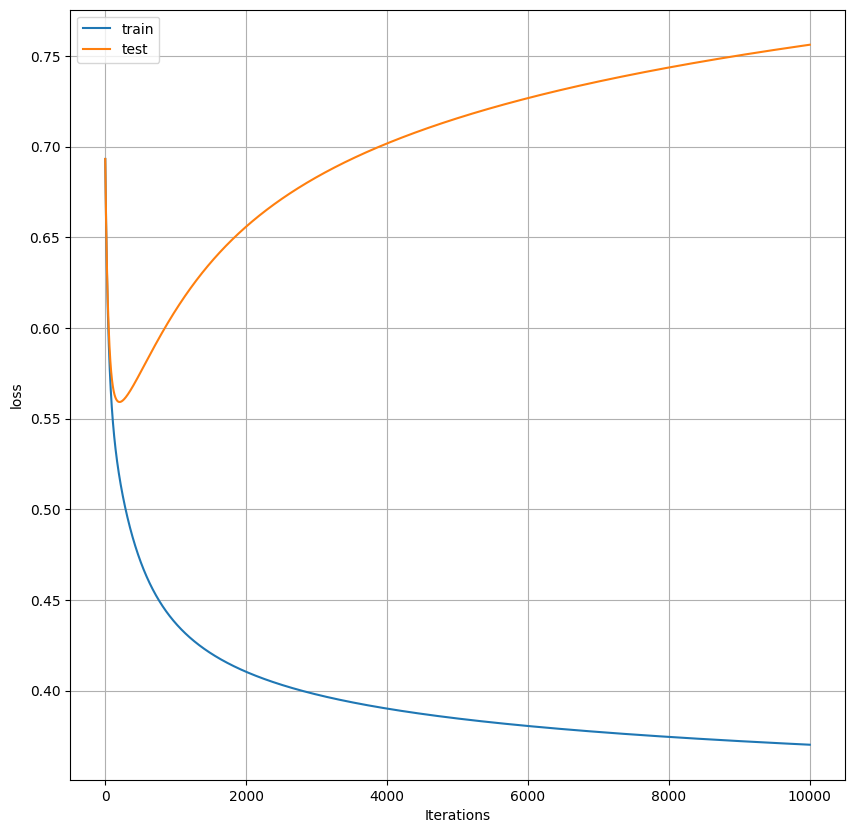

In [53]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

f, ax = plt.subplots(1, 1, figsize = (10, 10))

xx = np.arange(len(hist["train"]))
ax.plot(xx, hist["train"], label = "train")
ax.plot(xx, hist["test"], label = "test")
ax.legend()
ax.grid()
ax.set_xlabel("Iterations")
ax.set_ylabel("loss")
plt.show()

# Prediction and Evaluation
- ROC, AUC
- precision recall
- f1 score

f1 score: 0.18520213577421815


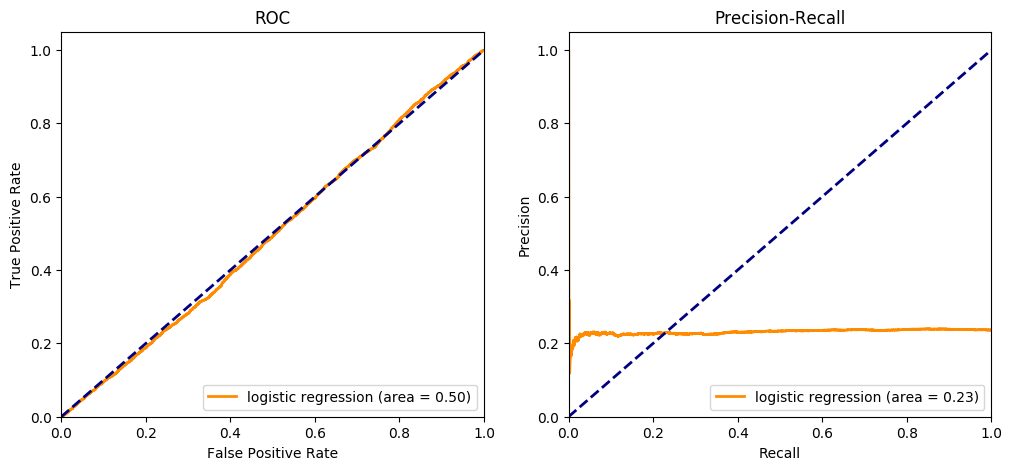

In [54]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
from optimizer import sigma, expand_constant

def predict(X, w):
    X = expand_constant(X)
    return sigma(X, w)

# ROC curve
pred_y = predict(test_X.to_numpy(), w)
fpr, tpr, thresholds = roc_curve(test_Y.to_numpy().reshape((-1, 1)), pred_y)
roc_auc = auc(fpr, tpr)

# precision recall
precision, recall, _ = precision_recall_curve(test_Y.to_numpy().reshape((-1, 1)), pred_y)
pr_auc = auc(recall, precision)

# f1 score
pred_Y = pred_y.copy()
pred_Y[np.where(pred_y[:, 0] < 0.5)] = 0
pred_Y[np.where(pred_y[:, 0] >= 0.5)] = 1
F1_score = f1_score(test_Y.to_numpy().reshape((-1, 1)), pred_Y)
print("f1 score: {0}".format(F1_score))

f, ax = plt.subplots(1, 2, figsize = (12, 5))
lw = 2
ax[0].plot(fpr, tpr, color='darkorange',
         lw=lw, label='logistic regression (area = {0:.2f})'.format(roc_auc))
ax[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC')
ax[0].legend(loc="lower right")

ax[1].plot(recall, precision, color='darkorange',
         lw=lw, label='logistic regression (area = {0:.2f})'.format(pr_auc))
ax[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall')
ax[1].legend(loc="lower right")

plt.show()